

**Project Summary.**

Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. In order to predict the trip duration, data mining techniques are employed in this project to predict the trip duration of rental bikes in Seoul Bike sharing system. The prediction is carried out with the combination of Seoul Bike data and weather data.

***Please use the Seoul Bike dataset.***

-What are the factors that influence the number of bikes rented?

-Explore the data for outliers and missing values.

-Plot the correlation between the variables and state your comments

-Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.

-Coment on Model performance by using approapriate diagnostics and measures.

In [302]:
#Import libs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

In [303]:
#load Data
data=pd.read_csv("/content/SeoulBikeData.csv")

In [304]:
print(data.shape)

(8760, 14)


In [305]:
#overview
print(data.head())

         Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]


In [306]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [307]:
data.shape#dimension of data

(8760, 14)

## Factores influencing total bikes rented

In [308]:
print("Factors influencing no. of bikes rented:")
print(data.columns.values)

Factors influencing no. of bikes rented:
['Date' 'Rented Bike Count' 'Hour' 'Temperature(C)' 'Humidity(%)'
 'Wind speed (m/s)' 'Visibility (10m)' 'Dew point temperature(C)'
 'Solar Radiation (MJ/m2)' 'Rainfall(mm)' 'Snowfall (cm)' 'Seasons'
 'Holiday' 'Functioning Day']


In [309]:
print("Missing data:")
miss_val=data.isna().sum()
print(miss_val)

Missing data:
Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


In [310]:
data.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [311]:
#Considering date
from datetime import datetime
data.Date=pd.to_datetime(data.Date )
data.info()
data['Month']=pd.DatetimeIndex(data['Date']).month
data['Year']=pd.DatetimeIndex(data['Date']).year
data['tday']=pd.DatetimeIndex(data['Date']).day
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


Outlier Analysis:


<function matplotlib.pyplot.show>

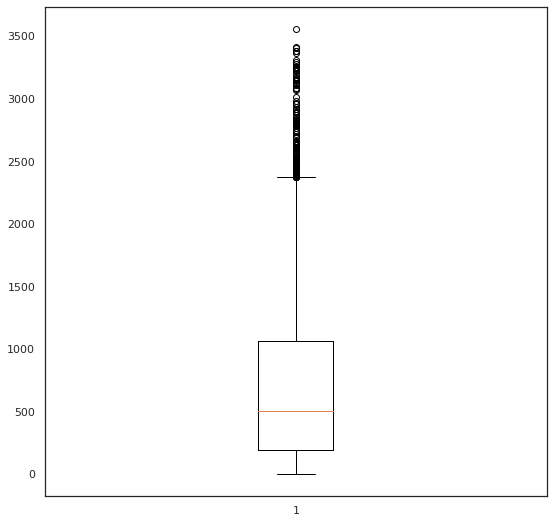

In [312]:
#EDA
print("Outlier Analysis:")
plt.figure(figsize=(9,9))
plt.boxplot(data['Rented Bike Count'])
plt.show

In [313]:
print("Check for categorical values")

Check for categorical values


In [314]:
df=data.select_dtypes(include='object')

In [315]:
print("Categorical Values:", df.head())

Categorical Values:   Seasons     Holiday Functioning Day
0  Winter  No Holiday             Yes
1  Winter  No Holiday             Yes
2  Winter  No Holiday             Yes
3  Winter  No Holiday             Yes
4  Winter  No Holiday             Yes


In [316]:
#create dummies of cat features
df1=data
for m in df:
  dummies =pd.get_dummies(data[m],drop_first=True)
  df1 = pd.concat([df1,dummies],axis='columns')

In [317]:
print("Check Categorical Values: ")
df1.head()

Check Categorical Values: 


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a87e155d0>,
      dtype=object)

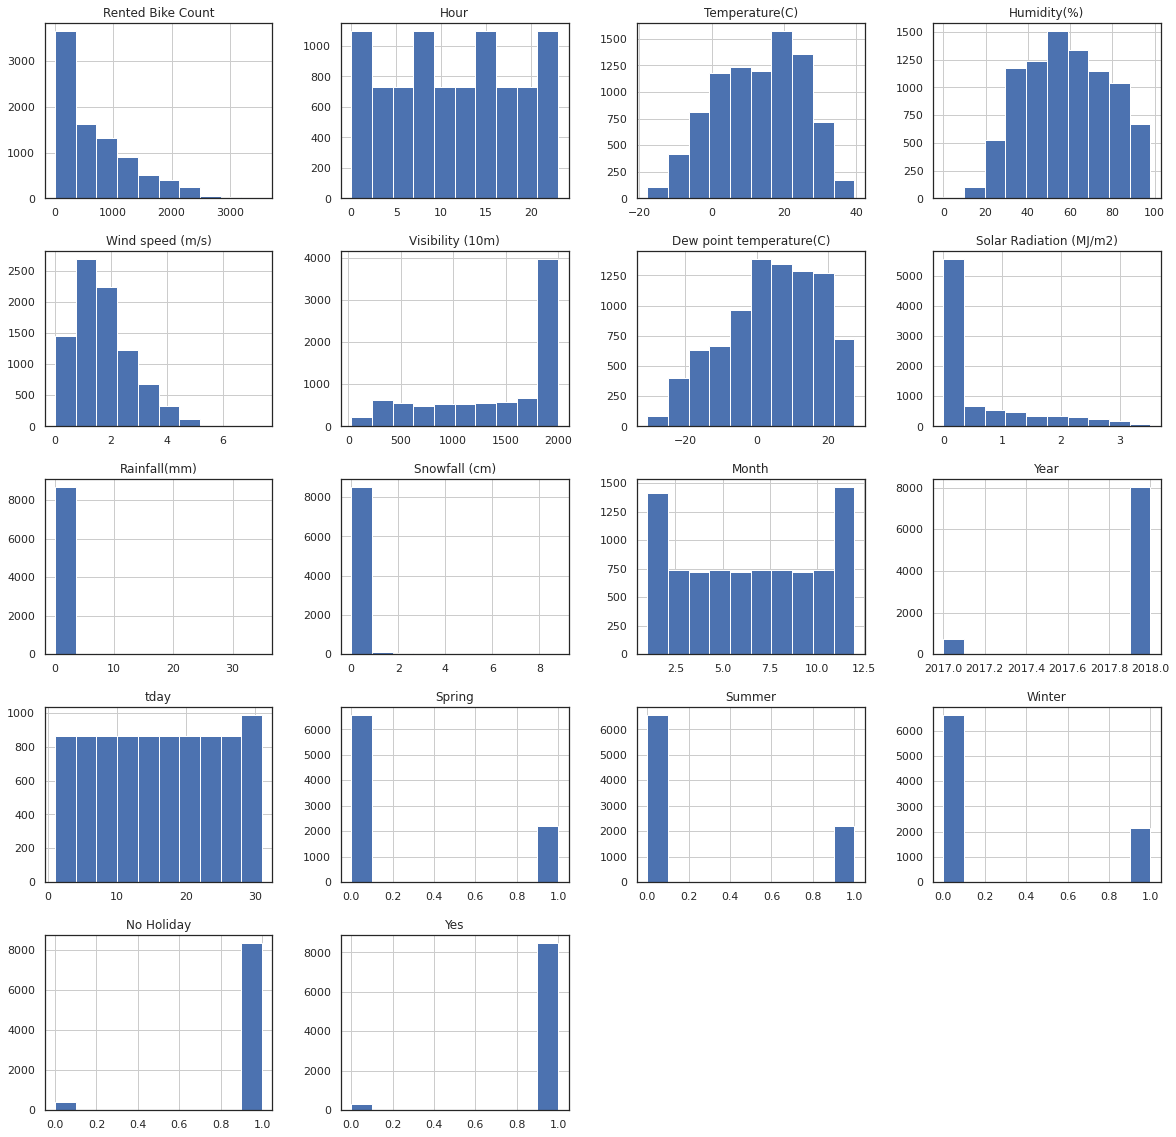

In [318]:
df1.hist(figsize=(20,20))

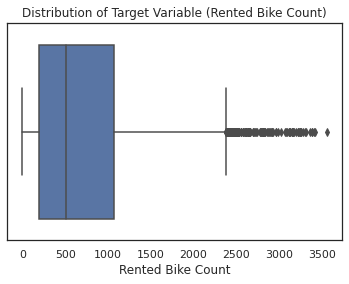

In [319]:
#outlier analysis:
sns.boxplot(df1['Rented Bike Count'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

In [320]:
#remove outlier
Q1 = np.percentile(df1['Rented Bike Count'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1['Rented Bike Count'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1['Rented Bike Count'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim) 

low limit: -1120.75
upper limit: 2377.25


In [321]:
df1.rename(columns = {'Rented Bike Count':'RBC'}, inplace = True)

In [322]:
df2 = df1[df1.RBC< up_lim]
df2=df2[df2.RBC> low_lim]


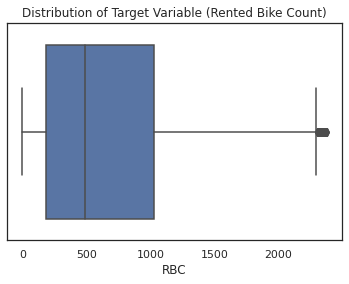

In [323]:
sns.boxplot(df2['RBC'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

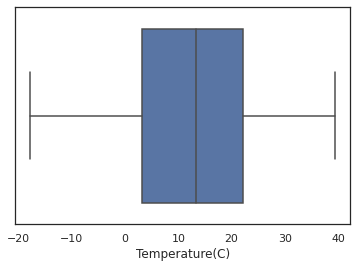

In [324]:
sns.boxplot(df2['Temperature(C)'])

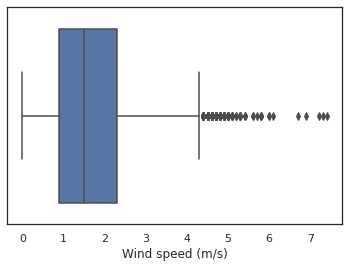

In [325]:
sns.boxplot(df2['Wind speed (m/s)'])

In [326]:
df2.rename(columns = {'Wind speed (m/s)':'ws'}, inplace = True)

In [327]:
Q1 = np.percentile(df2['ws'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df2['ws'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df2['ws'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [328]:
df2=df2[df2.ws<up_lim]
df2=df2[df2.ws>low_lim]

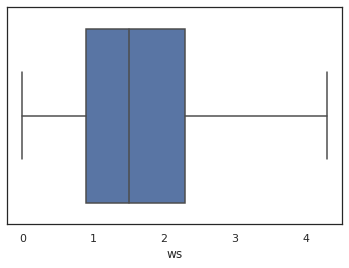

In [329]:
sns.boxplot(df2.ws)

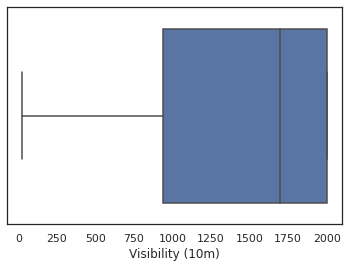

In [330]:
sns.boxplot(df1['Visibility (10m)'])

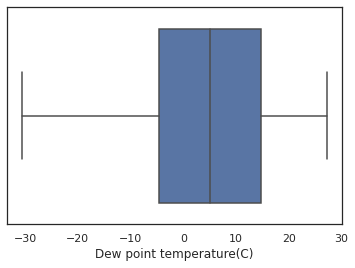

In [331]:
sns.boxplot(df2['Dew point temperature(C)'])

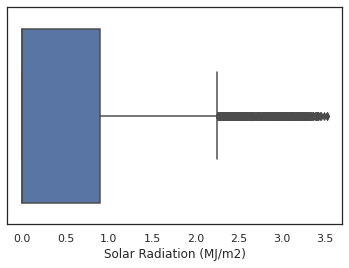

In [332]:
sns.boxplot(df2['Solar Radiation (MJ/m2)'])

In [333]:
df2.rename(columns = {'Solar Radiation (MJ/m2)':'sr'}, inplace = True)

In [334]:
Q1 = np.percentile(df2['sr'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df2['sr'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df2['sr'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [335]:
df2 = df2[df2.sr< up_lim]
df2 = df2[df2.sr>low_lim]

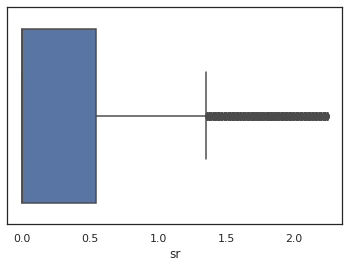

In [336]:
sns.boxplot(df2.sr)

In [337]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      7752 non-null   datetime64[ns]
 1   RBC                       7752 non-null   int64         
 2   Hour                      7752 non-null   int64         
 3   Temperature(C)            7752 non-null   float64       
 4   Humidity(%)               7752 non-null   int64         
 5   ws                        7752 non-null   float64       
 6   Visibility (10m)          7752 non-null   int64         
 7   Dew point temperature(C)  7752 non-null   float64       
 8   sr                        7752 non-null   float64       
 9   Rainfall(mm)              7752 non-null   float64       
 10  Snowfall (cm)             7752 non-null   float64       
 11  Seasons                   7752 non-null   object        
 12  Holiday             

## Correlation

In [338]:
data_corr=df2.corr()
data_corr=data_corr['RBC'][:-1]
data_corr[abs(data_corr)>=0.0].sort_values(ascending=False)

RBC                         1.000000
Temperature(C)              0.533168
Hour                        0.400517
Dew point temperature(C)    0.381486
Summer                      0.300130
sr                          0.248899
Year                        0.210914
Visibility (10m)            0.188051
ws                          0.106349
Month                       0.085771
No Holiday                  0.070541
tday                        0.047612
Spring                      0.013486
Rainfall(mm)               -0.125173
Snowfall (cm)              -0.140926
Humidity(%)                -0.162957
Winter                     -0.420918
Name: RBC, dtype: float64

In [339]:
df1=df2

Correlation between variables: 


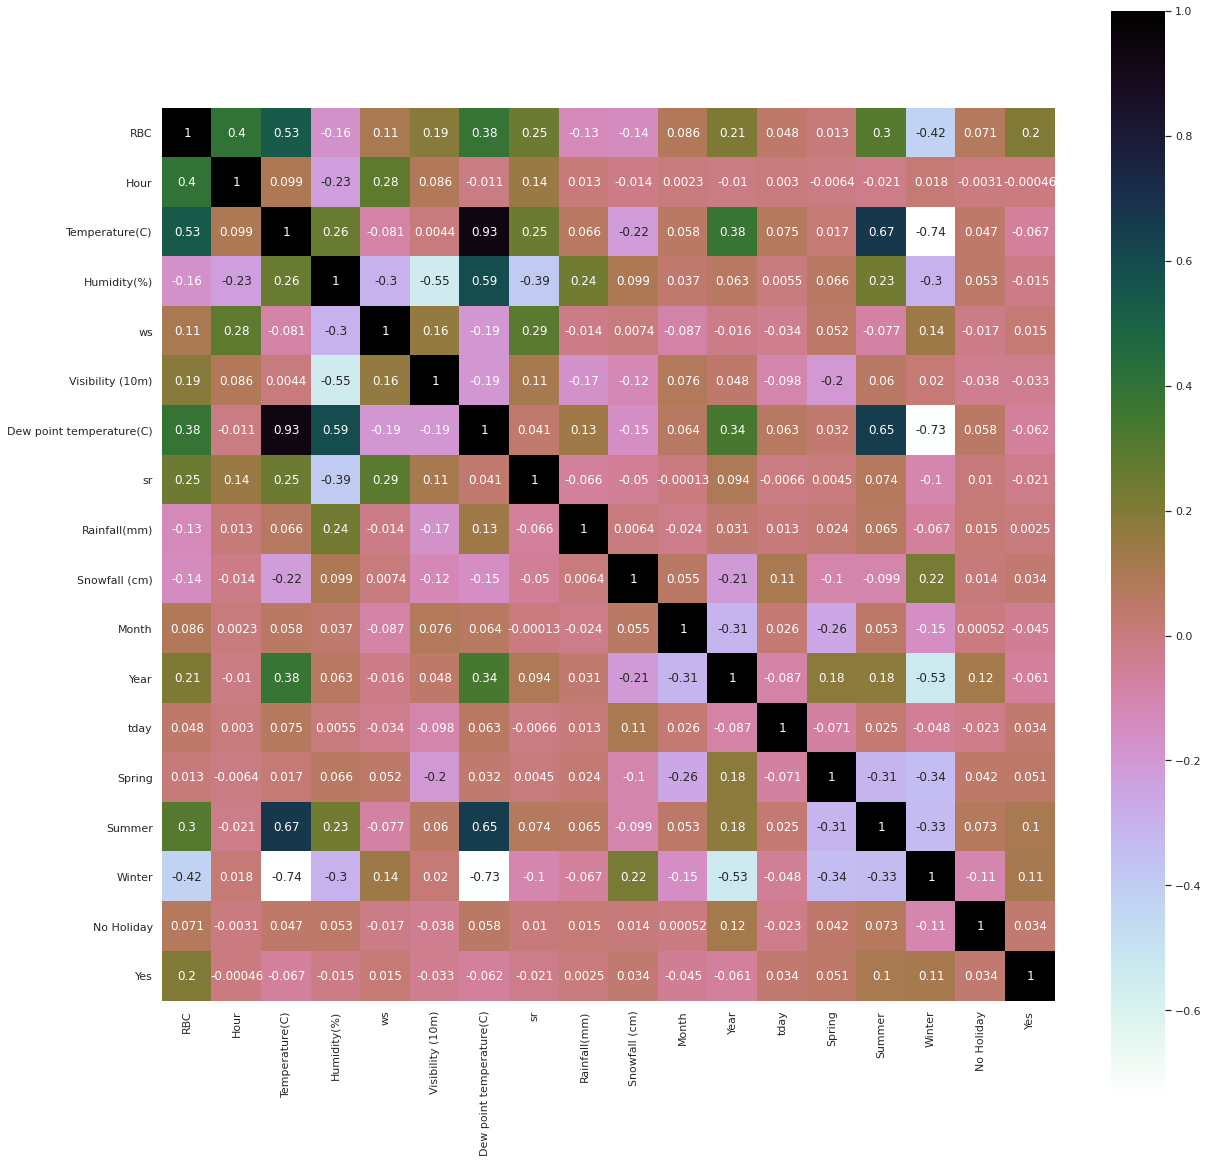

In [340]:
print("Correlation between variables: ")
corr=df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

In [341]:
#datac=data.drop(['Date','Seasons'],axis=1)
#datad=data[['Rented Bike Count','Temperature(C)','Hour']]
#datac=df1.select_dtypes(include=['float64','int64'])
print(df1.shape)
print(df1.columns.values)


(7752, 22)
['Date' 'RBC' 'Hour' 'Temperature(C)' 'Humidity(%)' 'ws'
 'Visibility (10m)' 'Dew point temperature(C)' 'sr' 'Rainfall(mm)'
 'Snowfall (cm)' 'Seasons' 'Holiday' 'Functioning Day' 'Month' 'Year'
 'tday' 'Spring' 'Summer' 'Winter' 'No Holiday' 'Yes']


In [342]:
df1=df1.drop(['Date','Seasons','Holiday','Functioning Day','Rainfall(mm)'],axis=1)

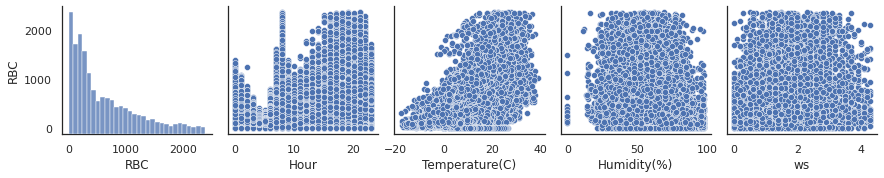

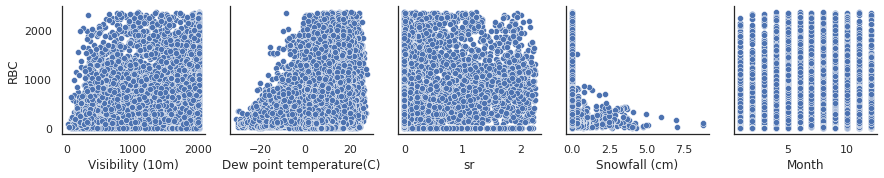

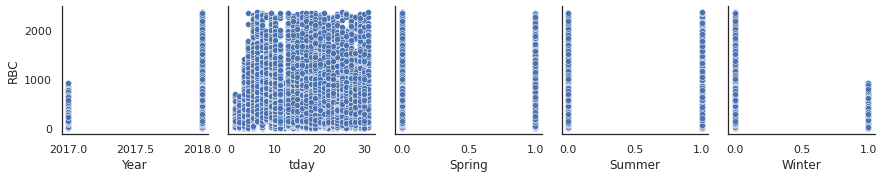

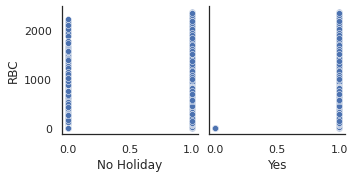

In [343]:
for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=df1,
                x_vars=df1.columns[i:i+5],
                y_vars=['RBC'])

In [344]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data
scaler.fit(df1)
#from sklearn.preprocessing import normalize
#normalize(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

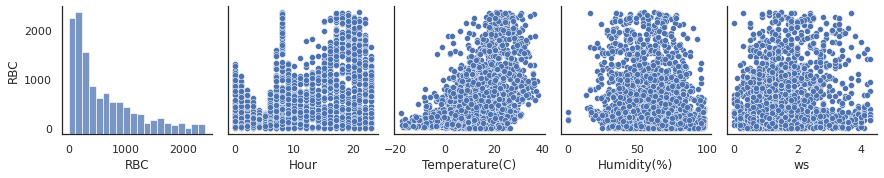

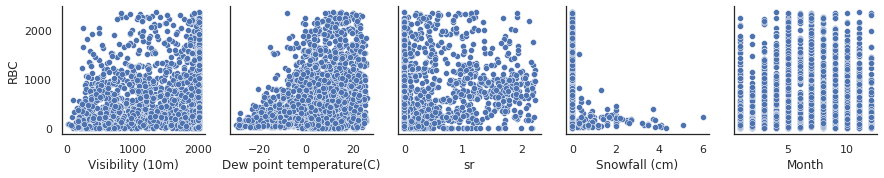

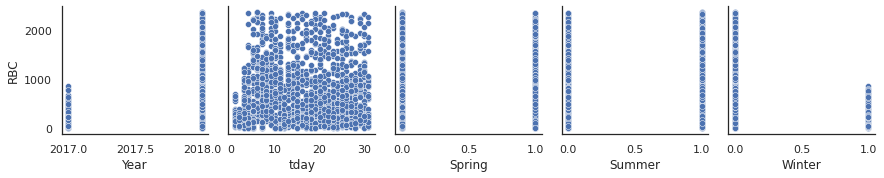

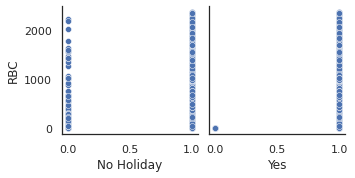

In [345]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1, test_size=0.25)
for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=val,
                x_vars=val.columns[i:i+5],
                y_vars=['RBC'])

In [346]:
tx=train.drop(['RBC'],axis=1)
ty=train['RBC']

vx=val.drop(['RBC'],axis=1)
vy=val['RBC']

In [347]:
print(ty.shape)
print(tx.shape)
print(vy.shape)
print(vx.shape)
test=data[6570:]

(5814,)
(5814, 16)
(1938,)
(1938, 16)


In [348]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(tx,ty)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [349]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(vx)


In [350]:

print("The model's metrics values are: ")
print("Accuracy: ", lr.score(vx,vy))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , vy))
print("Mean Squared Error: " ,mean_squared_error(df_pred,vy))
print("R-squared score: ", r2_score(vy,df_pred))

The model's metrics values are: 
Accuracy:  0.531551223322815
Mean Absolute Error:  311.1520533909369
Mean Squared Error:  168089.58881919726
R-squared score:  0.531551223322815


In [351]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(tx,ty)
rp=ridge.predict(vx)
ridge_score = ridge.score(vx,vy)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_
print("L2 Regression:")
print("R-square score:", r2_score(rp,vy))
print("training score",ridge_score)
print("number of feature used:",coeff_used)


L2 Regression:
R-square score: 0.14135140959744086
training score 0.5314624265145886
number of feature used: 16


In [352]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(tx,ty)
lp=lasso.predict(vx)
lasso_score = lasso.score(vx,vy)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_
print("L1 Regression:")
print("R-squared score:",r2_score(lp,vy))
print("training score",lasso_score)
print("number of feature used:",coeff_used)

L1 Regression:
R-squared score: 0.12566509517029922
training score 0.5297844032415505
number of feature used: 16


Conclusion:
1. Factors are Columns listed above
2. No Missing Values
3. Fixed outliers
4. removed rainfall as high percentage of 0's
5. Correlation plotted
6. Linear Regression model used
7. R^2 score is approximately 53
8. Further Processing needs to be done and another model may be better
9. using OLS is not necessary even though it gives a better score
10. Date included as split variables for better understanding
11. Model can be optimized later.